In [11]:
# load the dataset
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('winequality_edited.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### #1: Do wines with higher alcoholic content receive better ratings?m
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [12]:
# Use query to select each group and get its mean quality
median_alcohol = df.median().alcohol
low_alcohol = df.query('alcohol < @median_alcohol')
high_alcohol = df.query('alcohol >=@median_alcohol')

mean_quality_low = low_alcohol.mean().quality
mean_quality_high = high_alcohol.mean().quality

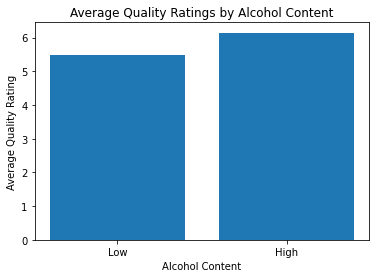

In [13]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [14]:
# Use query to select each group and get its mean quality
median_sugar = df['residual sugar'].median()
low_sugar = df.query('`residual sugar` < @median_sugar')
high_sugar = df.query('`residual sugar` >= @median_sugar')

mean_quality_sugar_low = low_sugar.mean().quality
mean_quality_sugar_high = high_sugar.mean().quality

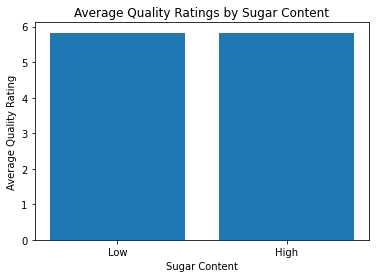

In [15]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_sugar_low, mean_quality_sugar_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [19]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [20]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low']
# Creates acidity_levels column
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [28]:
# Find the mean quality of each acidity level with groupby
acidity_level_means = df.groupby('acidity_levels').mean().quality
acidity_level_means

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

<AxesSubplot:title={'center':'Average Quality by Acidity Level'}, xlabel='acidity_levels'>

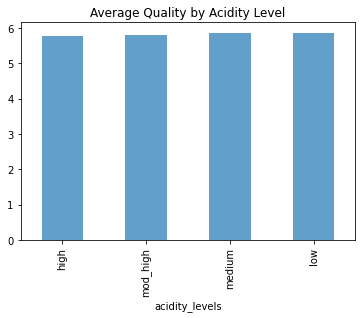

In [26]:
# Create a bar chart with proper labels
acidity_level_means.plot(kind='bar', title='Average Quality by Acidity Level', alpha=.7)
